# Letter Recognition Project- Preparing the Dataset
* In this notebook, we apply the necessary operations to our dataset, such as correcting the rotation, splitting and labeling the letters.

### Import necessary libraries

In [1]:
import os
from itertools import product
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageOps


### Create label dictionaries for the front and the back page.
* dict1 includes the labels for the letters in the front page.
* dict2 includes the labels for the letters in the back page.

In [2]:
dict1 = {
    1: 'A',
    2: 'B',
    3: 'C',
    4: 'D',
    5: 'E',
    6: 'F',
    7: 'G',
    8: 'H',
    9: 'I',
    10: 'J',
    11: 'K',
    12: 'L',
    13: 'M',
    14: 'N',
    15: 'O',
    16: 'P',
    17: 'Q',
    18: 'R',
    19: 'S',
    20: 'T',
    21: 'U',
    22: 'V',
    23: 'W',
    24: 'X',
    25: 'Y',
    26: 'Z',
    27: 'Ç',
    28: 'Ö',
    29: 'a',
    30: 'b',
    31: 'c',
    32: 'd',
    33: 'e',
    34: 'f',
    35: 'g',
    36: 'h',
    37: 'i',
    38: 'j',
    39: 'k',
    40: 'l',
    41: 'm',
    42: 'n',
    43: 'o',
    44: 'p',
    45: 'q',
    46: 'r',
    47: 's',
    48: 't',
    49: 'u',
    50: 'v',
    51: 'w',
    52: 'x',
    53: 'y',
    54: 'z',
    55: 'ç',
    56:'ö'
}


In [3]:
dict2 = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 
    20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: 'Ç', 28: 'Ö', 
    29: 'Ğ', 30: 'Ü', 31: 'Ş', 32: 'Ğ', 33: 'Ü', 34: 'Ş',
    35: ' ',
    36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 
    45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 
    54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: 'ç', 
    63: 'ö', 64: 'ğ', 65: 'ü', 66: 'ş', 67: 'ğ', 68: 'ü', 69: 'ş',
    70: ' '
}


## Enhance Contrast 
* This function helps to make it easier to understand the writings in the picture

In [5]:
def enhance_contrast_and_threshold(img, threshold=128):
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(img)
    enhanced_img = enhancer.enhance(2.0)
    # Convert to grayscale and apply binary threshold
    bw = ImageOps.grayscale(enhanced_img)
    bw = bw.point(lambda p: p > threshold and 255)

    return bw

## Correct the rotation
* Some pictures are not in the correct rotation. This function checks for the top left part of the images, if it finds more than 50 pixels, that means there is a small A in the box, this means the image is in the correct rotation. If the number of pixels is less than 50, the rotation is uncorrect, the image is rotated by 90 degrees. This process is done until the rotation is right.

In [21]:
def is_correct_orientation(img, is_front_page):
    a, b, c, d = 20, 20, 50, 50
    w=c-a
    h=d-b
    box = (a, b, c, d)
    top_left = img.crop(box)
    processed_top_left = enhance_contrast_and_threshold(top_left)
    plt.imshow(processed_top_left)
    plt.show()
    black_pixels = sum(p < 128 for p in processed_top_left.getdata())
    if black_pixels < 50:
        img = img.rotate(90, expand=1)
        return is_correct_orientation(img, is_front_page)
    else:
        return img

* Here is an example of correcting the rotation

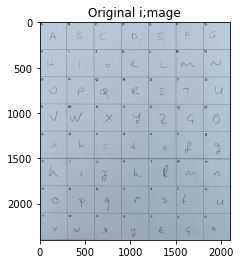

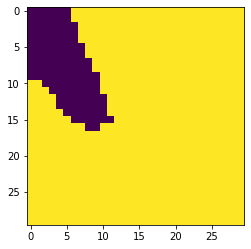

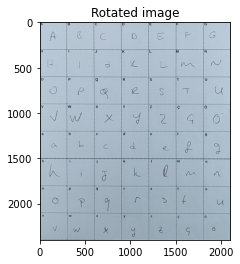

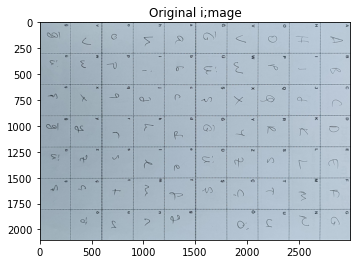

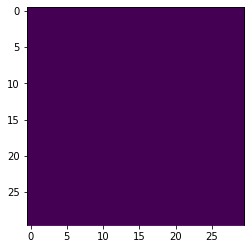

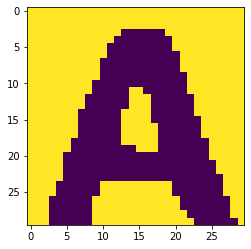

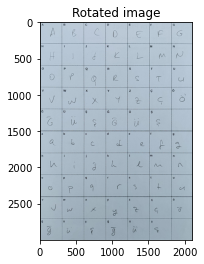

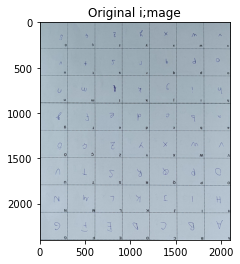

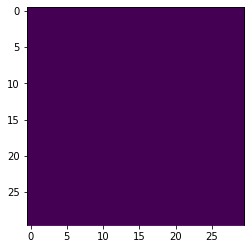

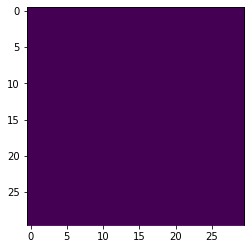

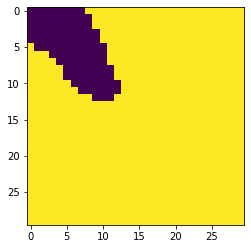

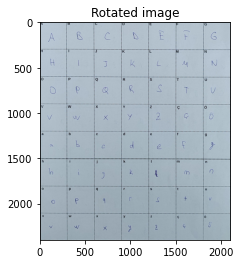

In [28]:
files = os.listdir('gorseller')

for file in files:
    if file.endswith('.jpg') or file.endswith('.jpeg'):
        is_front_page ='1.' in file
        file_path = os.path.join("gorseller", file)
        img = Image.open(file_path)
        plt.title("Original image")
        plt.imshow(img)
        plt.show()
        img = is_correct_orientation(img, is_front_page)
        plt.title("Rotated image")
        plt.imshow(img)
        plt.show()
        img.save(file_path)

## Splitting the letters and labeling

In [17]:
def tile(filename, dir_in, dir_out, d, name_dict):
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    w, h = img.size
    os.makedirs(os.path.join(dir_out, name), exist_ok=True)
    grid = [(i, j) for i in range(0, h - h % d, d) for j in range(0, w - w % d, d)]
    count = 1  # Counter for dictionary keys
    for i, j in grid:
        box = (j + 50, i + 50, j + d - 20, i + d - 20)
        if count in name_dict:
            out = os.path.join(dir_out, name, f'{name}_{name_dict[count]}{ext}')  # Use dictionary value for file name
            img.crop(box).rotate(0, expand=True).save(out)
        count += 1

files = os.listdir('gorseller')

for file in files:
    if os.path.isfile(os.path.join('gorseller', file)):
        folder_dict = dict1 if file.endswith(('1.jpg', '2.jpg')) else dict2
        print("File name:", file)
        tile(file, 'gorseller', 'bolunmus_gorseller', 300, folder_dict)

File name: 1.1.jpg
File name: 1.2.jpg


In [ ]:
def tile(filename, dir_in, dir_out, name_dict):
    main_name = filename.split('.')[0]
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))

    # Determine the grid layout based on the file name
    if '.1.' in filename:
        rows, cols = 8, 7
        label_dict = dict1
    elif '.2.' in filename:
        rows, cols = 10, 7
        label_dict = dict2
    else:
        print(f"File {filename} does not match expected format.")
        return  # Skip this file

    w, h = img.size
    os.makedirs(os.path.join(dir_out, main_name), exist_ok=True)

    cell_w, cell_h = w // cols, h // rows

    count = 1
    for i in range(rows):
        for j in range(cols):
            box = (j * cell_w + 50, i * cell_h + 50, (j + 1) * cell_w - 20, (i + 1) * cell_h - 20)

            if count in label_dict:
                label = label_dict[count]
                out = os.path.join(dir_out, main_name, f'{name}_{label}_{count}{ext}')
                img.crop(box).rotate(0, expand=True).save(out)
            count += 1

files = os.listdir('gorseller')
for i in files:
    print("File name:", i)
    tile(i, 'gorseller', 'bolunmus_gorseller', 300)


File name: 1.1.jpg
File name: 1.2.jpg
File name: 10.1.jpg
File name: 10.2.jpg
File name: 11.1.jpg
File name: 12.1.jpg
File name: 12.2.jpg
File name: 13.1.jpg
File name: 13.2.jpg
File name: 14.1.jpg
File name: 14.2.jpg
File name: 15.1.jpg
File name: 15.2.jpg
File name: 16.1.jpg
File name: 16.2.jpg
File name: 17.1.jpg
File name: 17.2.jpg
File name: 18.1.jpg
File name: 18.2.jpg
File name: 19.1.jpg
File name: 19.2.jpg
File name: 2.1.jpg
File name: 2.2.jpg
File name: 20.1.jpg
File name: 20.2.jpg
File name: 21.1.jpg
File name: 21.2.jpg
File name: 22.1.jpg
File name: 22.2.jpg
File name: 23.1.jpg
File name: 23.2.jpg
File name: 24.1.jpg
File name: 24.2.jpg
File name: 25.1.jpg
File name: 25.2.jpg
File name: 26.1.jpg
File name: 26.2.jpg
File name: 27.1.jpg
File name: 27.2.jpg
File name: 28.1.jpeg
File name: 28.2.jpg
File name: 29.1.jpg
File name: 29.2.jpg
File name: 3.1.jpg
File name: 3.2.jpg
File name: 30.1.jpg
File name: 30.2.jpg
File name: 31.1.jpg
File name: 31.2.jpg
File name: 32.1.jpg
File 